In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold

In [ ]:
ticker = "^NSEI"

# Define the date range for the historical data
start_date = "2017-01-01"
end_date = "2023-08-27"

# Retrieve historical data using yfinance
data = yf.download(ticker, start=start_date, end=end_date)

# Print the first few rows of the dataset
print(data.head())

[*********************100%%**********************]  1 of 1 completed
                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2017-01-02  8210.099609  8212.000000  8133.799805  8179.500000  8179.500000   
2017-01-03  8196.049805  8219.099609  8148.600098  8192.250000  8192.250000   
2017-01-04  8202.650391  8218.500000  8180.899902  8190.500000  8190.500000   
2017-01-05  8226.650391  8282.650391  8223.700195  8273.799805  8273.799805   
2017-01-06  8281.849609  8306.849609  8233.250000  8243.799805  8243.799805   

            Volume  
Date                
2017-01-02  118300  
2017-01-03  127300  
2017-01-04  132400  
2017-01-05  159100  
2017-01-06  139400  


In [ ]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-08-21,19320.650391,19425.949219,19296.300781,19393.599609,19393.599609,262600
2023-08-22,19417.099609,19443.500000,19381.300781,19396.449219,19396.449219,208700
2023-08-23,19439.199219,19472.050781,19366.599609,19444.000000,19444.000000,225200
2023-08-24,19535.150391,19584.449219,19369.000000,19386.699219,19386.699219,268300
2023-08-25,19297.400391,19339.550781,19229.699219,19265.800781,19265.800781,466500


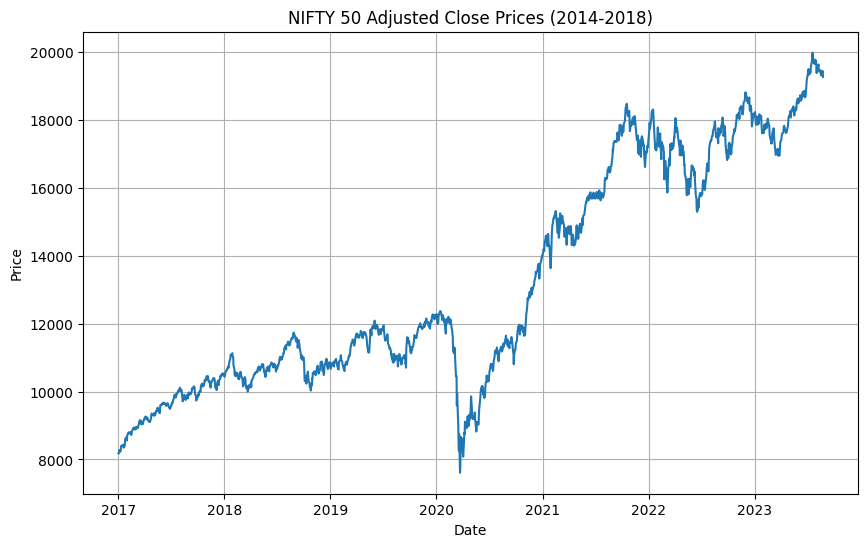

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Adj Close'])
plt.title('NIFTY 50 Adjusted Close Prices (2014-2018)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [ ]:
data=data.drop(['Adj Close'],axis=1)

In [ ]:
features = data[['Open', 'High', 'Low', 'Close', 'Volume']]

# Scale the features using Min-Max Scaler
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)



In [ ]:
features_oc = data[['Open', 'Close']]

# Scale the features using Min-Max Scaler
scaler_oc = MinMaxScaler()
scaled_features_oc = scaler_oc.fit_transform(features_oc)

In [ ]:
features_ocl = data[['Open','Low', 'Close']]

# Scale the features using Min-Max Scaler
scaler_ocl = MinMaxScaler()
scaled_features_ocl = scaler_ocl.fit_transform(features_ocl)

In [ ]:
features_oclh = data[['Open','Low','High','Close']]

# Scale the features using Min-Max Scaler
scaler_oclh = MinMaxScaler()
scaled_features_oclh = scaler_oclh.fit_transform(features_oclh)

In [ ]:
features1=data['Close']
features1=np.array(features1)
scaler3 = MinMaxScaler()
scaled_features3 = scaler3.fit_transform(features1.reshape(-1,1))



In [ ]:
normalized=pd.DataFrame()

In [ ]:
normalized = data.copy()
normalized[['Open', 'High', 'Low', 'Close', 'Volume']] = scaled_features


In [ ]:
normalized_oc = data.copy()
normalized_oc[['Open', 'Close']] = scaled_features_oc

In [ ]:
normalized_ocl = data.copy()
normalized_ocl[['Open','Low', 'Close']] = scaled_features_ocl

In [ ]:
normalized_oclh = data.copy()
normalized_oclh[['Open','Low','High', 'Close']] = scaled_features_oclh

In [ ]:
normalized_oc=normalized_oc.drop(['High','Low','Volume'],axis=1)

In [ ]:
normalized_ocl=normalized_ocl.drop(['High','Volume'],axis=1)

In [ ]:
normalized_oclh=normalized_oclh.drop(['Volume'],axis=1)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_data, test_data = train_test_split(normalized, test_size=0.2, shuffle=False)

In [ ]:
print(train_data)

                Open      High       Low     Close    Volume
Date                                                        
2017-01-02  0.039201  0.014643  0.050844  0.046023  0.065323
2017-01-03  0.038041  0.015236  0.052052  0.047053  0.070293
2017-01-04  0.038586  0.015186  0.054690  0.046912  0.073109
2017-01-05  0.040567  0.020552  0.058184  0.053647  0.087852
2017-01-06  0.045123  0.022576  0.058964  0.051221  0.076974
...              ...       ...       ...       ...       ...
2022-04-25  0.765442  0.754281  0.765687  0.755419  0.152236
2022-04-26  0.774707  0.768463  0.780037  0.775376  0.144174
2022-04-27  0.770749  0.758998  0.771382  0.762246  0.146383
2022-04-28  0.780335  0.776715  0.780576  0.778954  0.172777
2022-04-29  0.791870  0.781328  0.779123  0.767433  0.185643

[1312 rows x 5 columns]


In [ ]:
train_data_oc, test_data_oc = train_test_split(normalized_oc, test_size=0.2, shuffle=False)

In [ ]:
train_data_ocl, test_data_ocl = train_test_split(normalized_ocl, test_size=0.2, shuffle=False)

In [ ]:
train_data_oclh, test_data_oclh = train_test_split(normalized_oclh, test_size=0.2, shuffle=False)

In [ ]:
print(test_data_oclh.shape)

(329, 4)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

In [ ]:
def create_sequences(data, sequence_length):
    sequences = []
    targets = []
    for i in range(len(data) - sequence_length):
        sequences.append(data[i:i+sequence_length])
        targets.append(data[i+sequence_length][3])
    return np.array(sequences), np.array(targets)


In [ ]:
def create_sequences_oc(data, sequence_length):
    sequences = []
    targets = []
    for i in range(len(data) - sequence_length):
        sequences.append(data[i:i+sequence_length])
        targets.append(data[i+sequence_length][1])
    return np.array(sequences), np.array(targets)

In [ ]:
def create_sequences_ocl(data, sequence_length):
    sequences = []
    targets = []
    for i in range(len(data) - sequence_length):
        sequences.append(data[i:i+sequence_length])
        targets.append(data[i+sequence_length][2])
    return np.array(sequences), np.array(targets)

In [ ]:
def create_sequences_oclh(data, sequence_length):
    sequences = []
    targets = []
    for i in range(len(data) - sequence_length):
        sequences.append(data[i:i+sequence_length])
        targets.append(data[i+sequence_length][3])
    return np.array(sequences), np.array(targets)

In [ ]:
sequence_length = 120

In [ ]:
X_train, y_train = create_sequences(train_data.values, sequence_length)
X_test, y_test = create_sequences(test_data.values, sequence_length)

In [ ]:
X_train_oc, y_train_oc = create_sequences_oc(train_data_oc.values, sequence_length)
X_test_oc, y_test_oc = create_sequences_oc(test_data_oc.values, sequence_length)

In [ ]:
X_train_ocl, y_train_ocl = create_sequences_ocl(train_data_ocl.values, sequence_length)
X_test_ocl, y_test_ocl = create_sequences_ocl(test_data_ocl.values, sequence_length)

In [ ]:
X_train_oclh, y_train_oclh = create_sequences_oclh(train_data_oclh.values, sequence_length)
X_test_oclh, y_test_oclh = create_sequences_oclh(test_data_oclh.values, sequence_length)

In [ ]:
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(sequence_length, 5)))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=1))


In [ ]:
model_oc = Sequential()
model_oc.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(sequence_length, 2)))
model_oc.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model_oc.add(MaxPooling1D(pool_size=2))
model_oc.add(Flatten())
model_oc.add(Dense(units=64, activation='relu'))
model_oc.add(Dense(units=32, activation='relu'))
model_oc.add(Dense(units=1))

In [ ]:
model_ocl = Sequential()
model_ocl.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(sequence_length, 3)))
model_ocl.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model_ocl.add(MaxPooling1D(pool_size=2))
model_ocl.add(Flatten())
model_ocl.add(Dense(units=64, activation='relu'))
model_ocl.add(Dense(units=32, activation='relu'))
model_ocl.add(Dense(units=1))

In [ ]:
model_oclh = Sequential()
model_oclh.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(sequence_length, 4)))
model_oclh.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model_oclh.add(MaxPooling1D(pool_size=2))
model_oclh.add(Flatten())
model_oclh.add(Dense(units=64, activation='relu'))
model_oclh.add(Dense(units=32, activation='relu'))
model_oclh.add(Dense(units=1))

In [ ]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
model_oc.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
model_ocl.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
model_oclh.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 8, 32)             512       
                                                                 
 conv1d_2 (Conv1D)           (None, 6, 64)             6208      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 3, 64)            0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 192)               0         
                                                                 
 dense (Dense)               (None, 64)                12352     
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                      

In [ ]:
from keras.callbacks import ModelCheckpoint

In [ ]:
checkpoint = ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True, mode='min', verbose=1)

# Train the model with ModelCheckpoint callback
history = model.fit(X_train, y_train, epochs=500, batch_size=16, validation_data=(X_test, y_test), callbacks=[checkpoint])

Epoch 1/500
44/49 [=========================>....] - ETA: 0s - loss: 0.0116
Epoch 1: val_loss improved from inf to 0.00518, saving model to best_model.h5
49/49 [==============================] - 1s 8ms/step - loss: 0.0107 - val_loss: 0.0052
Epoch 2/500
43/49 [=========================>....] - ETA: 0s - loss: 0.0016
Epoch 2: val_loss improved from 0.00518 to 0.00514, saving model to best_model.h5
49/49 [==============================] - 0s 5ms/step - loss: 0.0016 - val_loss: 0.0051
Epoch 3/500
43/49 [=========================>....] - ETA: 0s - loss: 0.0012
Epoch 3: val_loss did not improve from 0.00514
49/49 [==============================] - 0s 4ms/step - loss: 0.0012 - val_loss: 0.0078
Epoch 4/500
46/49 [===========================>..] - ETA: 0s - loss: 0.0011
Epoch 4: val_loss did not improve from 0.00514
49/49 [==============================] - 0s 4ms/step - loss: 0.0011 - val_loss: 0.0115
Epoch 5/500
43/49 [=========================>....] - ETA: 0s - loss: 0.0011
Epoch 5: val_loss 

In [ ]:
checkpoint = ModelCheckpoint(filepath='best_model_oc.h5', monitor='val_loss', save_best_only=True, mode='min', verbose=1)

# Train the model with ModelCheckpoint callback
history_oc = model_oc.fit(X_train_oc, y_train_oc, epochs=500, batch_size=16, validation_data=(X_test_oc, y_test_oc), callbacks=[checkpoint])

Epoch 1/500
48/49 [============================>.] - ETA: 0s - loss: 0.0092
Epoch 1: val_loss improved from inf to 0.01053, saving model to best_model_oc.h5
49/49 [==============================] - 1s 7ms/step - loss: 0.0091 - val_loss: 0.0105
Epoch 2/500
44/49 [=========================>....] - ETA: 0s - loss: 0.0025
Epoch 2: val_loss improved from 0.01053 to 0.00246, saving model to best_model_oc.h5
49/49 [==============================] - 0s 5ms/step - loss: 0.0024 - val_loss: 0.0025
Epoch 3/500
47/49 [===========================>..] - ETA: 0s - loss: 0.0015
Epoch 3: val_loss improved from 0.00246 to 0.00147, saving model to best_model_oc.h5
49/49 [==============================] - 0s 5ms/step - loss: 0.0015 - val_loss: 0.0015
Epoch 4/500
47/49 [===========================>..] - ETA: 0s - loss: 0.0012
Epoch 4: val_loss did not improve from 0.00147
49/49 [==============================] - 0s 4ms/step - loss: 0.0011 - val_loss: 0.0028
Epoch 5/500
46/49 [===========================>..]

In [ ]:
checkpoint = ModelCheckpoint(filepath='best_model_ocl.h5', monitor='val_loss', save_best_only=True, mode='min', verbose=1)

# Train the model with ModelCheckpoint callback
history_ocl = model_ocl.fit(X_train_ocl, y_train_ocl, epochs=500, batch_size=16, validation_data=(X_test_ocl, y_test_ocl), callbacks=[checkpoint])

Epoch 1/500
45/49 [==========================>...] - ETA: 0s - loss: 0.0101
Epoch 1: val_loss improved from inf to 0.00730, saving model to best_model_ocl.h5
49/49 [==============================] - 1s 7ms/step - loss: 0.0097 - val_loss: 0.0073
Epoch 2/500
48/49 [============================>.] - ETA: 0s - loss: 0.0023
Epoch 2: val_loss improved from 0.00730 to 0.00503, saving model to best_model_ocl.h5
49/49 [==============================] - 0s 4ms/step - loss: 0.0023 - val_loss: 0.0050
Epoch 3/500
49/49 [==============================] - ETA: 0s - loss: 0.0015
Epoch 3: val_loss improved from 0.00503 to 0.00142, saving model to best_model_ocl.h5
49/49 [==============================] - 0s 6ms/step - loss: 0.0015 - val_loss: 0.0014
Epoch 4/500
49/49 [==============================] - ETA: 0s - loss: 8.8880e-04
Epoch 4: val_loss did not improve from 0.00142
49/49 [==============================] - 0s 6ms/step - loss: 8.8880e-04 - val_loss: 0.0032
Epoch 5/500
40/49 [====================

In [ ]:
checkpoint = ModelCheckpoint(filepath='best_model_oclh.h5', monitor='val_loss', save_best_only=True, mode='min', verbose=1)

# Train the model with ModelCheckpoint callback
history_oclh = model_oclh.fit(X_train_oclh, y_train_oclh, epochs=250, batch_size=16, validation_data=(X_test_oclh, y_test_oclh), callbacks=[checkpoint])

Epoch 1/250
72/75 [===========================>..] - ETA: 0s - loss: 0.0152
Epoch 1: val_loss improved from inf to 0.00426, saving model to best_model_oclh.h5
75/75 [==============================] - 4s 18ms/step - loss: 0.0148 - val_loss: 0.0043
Epoch 2/250
72/75 [===========================>..] - ETA: 0s - loss: 0.0018
Epoch 2: val_loss did not improve from 0.00426
75/75 [==============================] - 1s 15ms/step - loss: 0.0019 - val_loss: 0.0144
Epoch 3/250
74/75 [============================>.] - ETA: 0s - loss: 0.0016
Epoch 3: val_loss improved from 0.00426 to 0.00220, saving model to best_model_oclh.h5
75/75 [==============================] - 1s 19ms/step - loss: 0.0016 - val_loss: 0.0022
Epoch 4/250
70/75 [===========================>..] - ETA: 0s - loss: 0.0013
Epoch 4: val_loss improved from 0.00220 to 0.00078, saving model to best_model_oclh.h5
75/75 [==============================] - 1s 15ms/step - loss: 0.0013 - val_loss: 7.7601e-04
Epoch 5/250
71/75 [=================

In [ ]:
from keras.models import load_model

# Assuming you have prepared the new data for prediction as 'X_new'

# Load the best model saved during training
best_model = load_model('best_model.h5')

# Make predictions using the loaded model
y_pred = best_model.predict(X_test)


OSError: ignored

In [ ]:
from keras.models import load_model


In [ ]:
best_model_oc = load_model('best_model_oc.h5')

# Make predictions using the loaded model
y_pred_oc = best_model_oc.predict(X_test_oc)

5/5 [==============================] - 0s 2ms/step


In [ ]:
best_model_ocl = load_model('best_model_ocl.h5')

# Make predictions using the loaded model
y_pred_ocl = best_model_ocl.predict(X_test_ocl)

5/5 [==============================] - 0s 2ms/step


In [ ]:
best_model_oclh = load_model('best_model_oclh.h5')

# Make predictions using the loaded model
y_pred_oclh = best_model_oclh.predict(X_test_oclh)

7/7 [==============================] - 0s 4ms/step


In [ ]:
y_pred = model.predict(X_test)

5/5 [==============================] - 0s 2ms/step


In [ ]:
y_pred_oc = model_oc.predict(X_test_oc)

5/5 [==============================] - 0s 3ms/step


In [ ]:
y_pred_ocl = model_ocl.predict(X_test_ocl)

5/5 [==============================] - 0s 2ms/step


In [ ]:
y_pred_oclh = model_oclh.predict(X_test_oclh)

7/7 [==============================] - 0s 5ms/step


In [ ]:
mse = np.mean((y_test - y_pred)**2)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.05607850818225397


In [ ]:
mse = np.mean((y_test_oc - y_pred_oc)**2)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.05690607823571888


In [ ]:
mse = np.mean((y_test_ocl - y_pred_ocl)**2)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.056164619314935785


In [ ]:
mse = np.mean((y_test_oclh - y_pred_oclh)**2)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.057268647429705874


In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2_val = r2_score(y_test, y_pred)

print("R-squared :", r2_val)

R-squared : 0.8340399379975298


In [ ]:
r2_val = r2_score(y_test_oc, y_pred_oc)

print("R-squared :", r2_val)

R-squared : 0.8903957126214497


In [ ]:
r2_val = r2_score(y_test_ocl, y_pred_ocl)

print("R-squared :", r2_val)

R-squared : 0.880205307985512


In [ ]:
r2_val = r2_score(y_test_oclh, y_pred_oclh)

print("R-squared :", r2_val)

R-squared : 0.9143492982289916


In [ ]:
y_pred_orig = scaler3.inverse_transform(y_pred.reshape(-1,1))
y_test_orig = scaler3.inverse_transform(y_test.reshape(-1,1))
y_train_orig= scaler3.inverse_transform(y_train.reshape(-1,1))

In [ ]:
y_pred_orig_oc = scaler3.inverse_transform(y_pred_oc.reshape(-1,1))
y_test_orig_oc = scaler3.inverse_transform(y_test_oc.reshape(-1,1))
y_train_orig_oc= scaler3.inverse_transform(y_train_oc.reshape(-1,1))

In [ ]:
y_pred_orig_ocl = scaler3.inverse_transform(y_pred_ocl.reshape(-1,1))
y_test_orig_ocl = scaler3.inverse_transform(y_test_ocl.reshape(-1,1))
y_train_orig_ocl= scaler3.inverse_transform(y_train_ocl.reshape(-1,1))

In [ ]:
y_pred_orig_oclh = scaler3.inverse_transform(y_pred_oclh.reshape(-1,1))
y_test_orig_oclh = scaler3.inverse_transform(y_test_oclh.reshape(-1,1))
y_train_orig_oclh= scaler3.inverse_transform(y_train_oclh.reshape(-1,1))

In [ ]:
print(y_test_orig_oclh.shape)

(209, 1)


In [ ]:
print(y_pred_orig_oclh[310:319])

[[19386.121]
 [19384.14 ]
 [19351.887]
 [19276.594]
 [19239.596]
 [19348.361]
 [19370.812]
 [19355.848]
 [19392.61 ]]


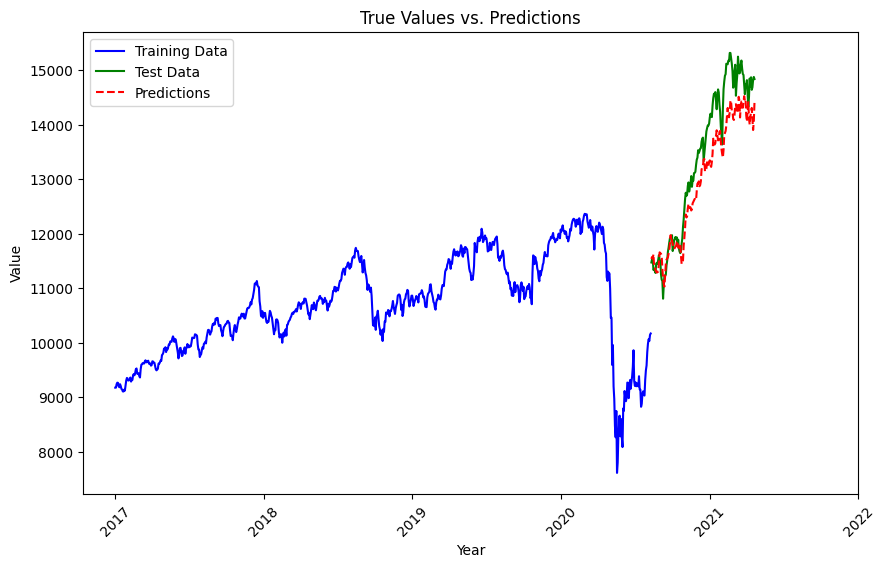

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have y_train_orig, y_test_orig, and y_pred_orig
# Calculate the time index for y_train, y_test, and y_pred
time_index_train = np.arange(len(y_train_orig))
time_index_test = np.arange(len(y_test_orig)) + len(y_train_orig)
time_index_pred = np.arange(len(y_pred_orig)) + len(y_train_orig)

# Manually specify the years you want to display on the x-axis
displayed_years = [2017, 2018, 2019, 2020, 2021,2022]

# Plot the true values, test values, and predicted values
plt.figure(figsize=(10, 6))
plt.plot(time_index_train, y_train_orig, label='Training Data', color='blue')
plt.plot(time_index_test, y_test_orig, label='Test Data', color='green')
plt.plot(time_index_pred, y_pred_orig, label='Predictions', color='red', linestyle='dashed')

# Set x-axis labels to the manually specified years
tick_positions = np.linspace(0, len(time_index_train) + len(time_index_test) + len(time_index_pred) - 1, len(displayed_years))
plt.xticks(tick_positions, displayed_years, rotation=45)

plt.xlabel('Year')
plt.ylabel('Value')
plt.title('True Values vs. Predictions')
plt.legend()

# plt.tight_layout()
plt.show()


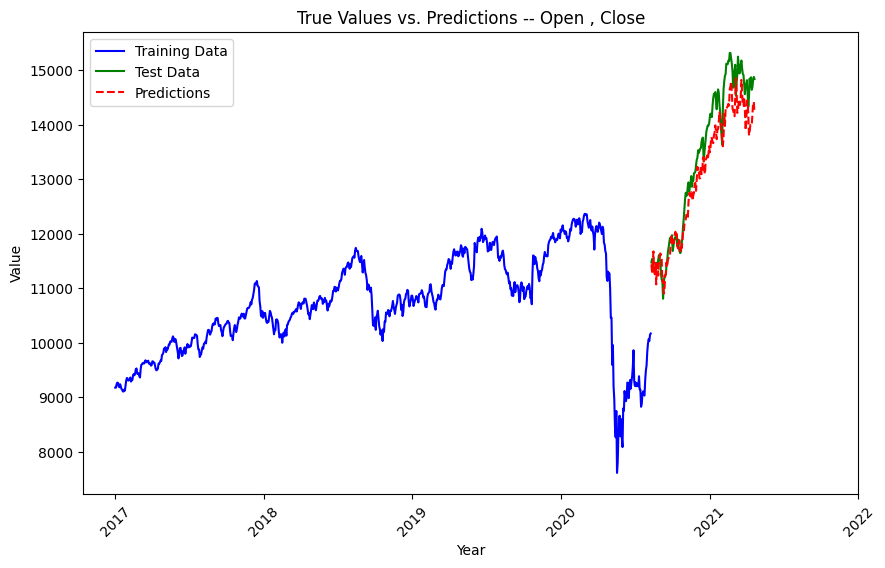

In [ ]:
time_index_train = np.arange(len(y_train_oc))

# Calculate the time_index for y_test and y_pred starting from the appropriate offset
time_index_test = np.arange(len(y_test_oc)) + len(y_train_oc)
time_index_pred = np.arange(len(y_pred_oc)) + len(y_train_oc)

# Plot the true values (y_train), the test values (y_test), and the predicted values (y_pred)
plt.figure(figsize=(10, 6))
plt.plot(time_index_train, y_train_orig_oc, label='Training Data', color='blue')
plt.plot(time_index_test, y_test_orig_oc, label='Test Data', color='green')
plt.plot(time_index_pred, y_pred_orig_oc, label='Predictions', color='red', linestyle='dashed')
tick_positions = np.linspace(0, len(time_index_train) + len(time_index_test) + len(time_index_pred) - 1, len(displayed_years))
plt.xticks(tick_positions, displayed_years, rotation=45)

plt.xlabel('Year')
plt.ylabel('Value')
plt.title('True Values vs. Predictions -- Open , Close')
plt.legend()

plt.show()

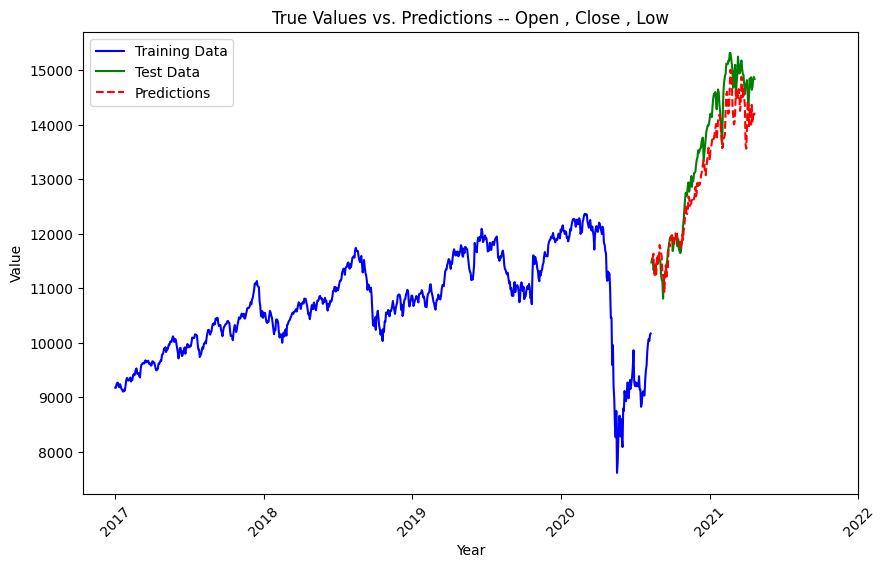

In [ ]:
time_index_train = np.arange(len(y_train_ocl))

# Calculate the time_index for y_test and y_pred starting from the appropriate offset
time_index_test = np.arange(len(y_test_ocl)) + len(y_train_ocl)
time_index_pred = np.arange(len(y_pred_ocl)) + len(y_train_ocl)

# Plot the true values (y_train), the test values (y_test), and the predicted values (y_pred)
plt.figure(figsize=(10, 6))
plt.plot(time_index_train, y_train_orig_ocl, label='Training Data', color='blue')
plt.plot(time_index_test, y_test_orig_ocl, label='Test Data', color='green')
plt.plot(time_index_pred, y_pred_orig_ocl, label='Predictions', color='red', linestyle='dashed')
tick_positions = np.linspace(0, len(time_index_train) + len(time_index_test) + len(time_index_pred) - 1, len(displayed_years))
plt.xticks(tick_positions, displayed_years, rotation=45)

plt.xlabel('Year')
plt.ylabel('Value')
plt.title('True Values vs. Predictions -- Open , Close , Low')
plt.legend()

plt.show()

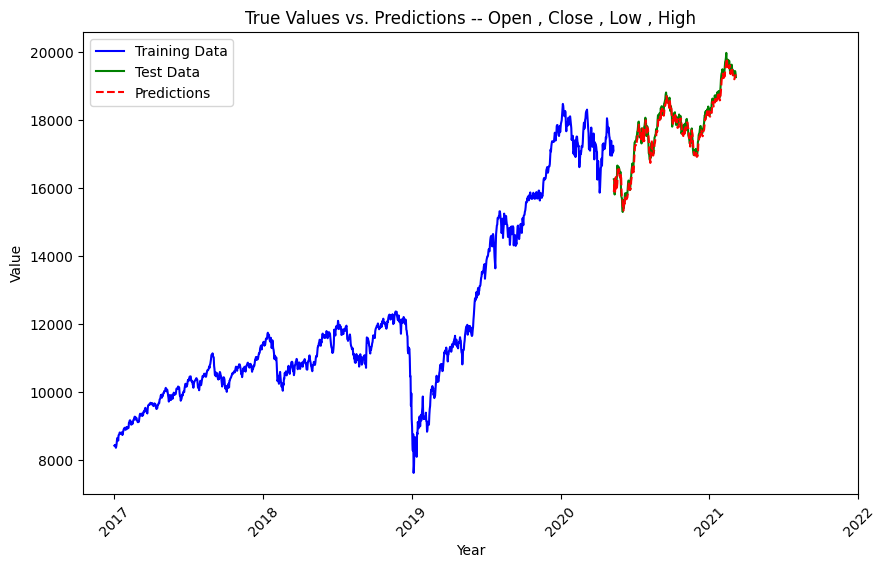

In [ ]:
time_index_train = np.arange(len(y_train_oclh))
displayed_years = [2017, 2018, 2019, 2020, 2021,2022]


# Calculate the time_index for y_test and y_pred starting from the appropriate offset
time_index_test = np.arange(len(y_test_oclh)) + len(y_train_oclh)
time_index_pred = np.arange(len(y_pred_oclh)) + len(y_train_oclh)

# Plot the true values (y_train), the test values (y_test), and the predicted values (y_pred)
plt.figure(figsize=(10, 6))
plt.plot(time_index_train, y_train_orig_oclh, label='Training Data', color='blue')
plt.plot(time_index_test, y_test_orig_oclh, label='Test Data', color='green')
plt.plot(time_index_pred, y_pred_orig_oclh, label='Predictions', color='red', linestyle='dashed')
tick_positions = np.linspace(0, len(time_index_train) + len(time_index_test) + len(time_index_pred) - 1, len(displayed_years))
plt.xticks(tick_positions, displayed_years, rotation=45)

plt.xlabel('Year')
plt.ylabel('Value')
plt.title('True Values vs. Predictions')
plt.title('True Values vs. Predictions -- Open , Close , Low , High')
plt.legend()

plt.show()

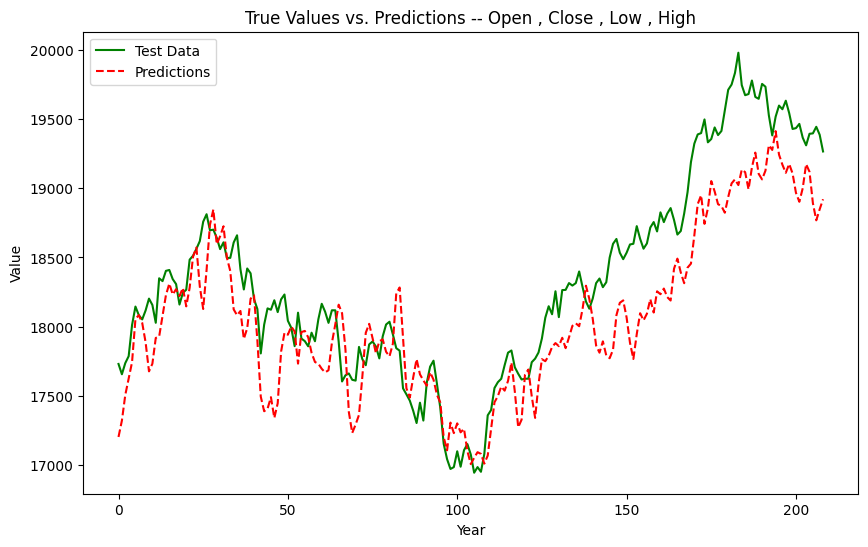

In [ ]:
# time_index_train = np.arange(len(y_train_oclh))
# displayed_years = [2017, 2018, 2019, 2020, 2021,2022]


# Calculate the time_index for y_test and y_pred starting from the appropriate offset
time_index_test = np.arange(len(y_test_oclh))
time_index_pred = np.arange(len(y_pred_oclh))

# Plot the true values (y_train), the test values (y_test), and the predicted values (y_pred)
plt.figure(figsize=(10, 6))
# plt.plot(time_index_train, y_train_orig_oclh, label='Training Data', color='blue')
plt.plot(time_index_test, y_test_orig_oclh, label='Test Data', color='green')
plt.plot(time_index_pred, y_pred_orig_oclh, label='Predictions', color='red', linestyle='dashed')
# tick_positions = np.linspace(0, len(time_index_train) + len(time_index_test) + len(time_index_pred) - 1, len(displayed_years))
# plt.xticks(tick_positions, displayed_years, rotation=45)

plt.xlabel('Year')
plt.ylabel('Value')
plt.title('True Values vs. Predictions')
plt.title('True Values vs. Predictions -- Open , Close , Low , High')
plt.legend()

plt.show()